In [1]:
import pickle
history = pickle.load(open('history_500_epoch_tr.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('tfr_plot1.png',bbox_inches = 'tight')
plt.clf()

NameError: name 'plt' is not defined

## Wavelet data generation..

In [1]:
'''
def func(cls):
  img_names = os.listdir('genres/'+cls)
  os.makedirs('wavelets/train/'+cls)
  os.makedirs('wavelets/test/'+cls)
  print(cls)
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    cnt+=1
    x , sr = librosa.load('genres/'+cls+'/'+nm)
    #plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x)
    plt.savefig('wavelets/train/'+cls+'/'+str(cnt)+'.png')
    plt.close()
  
  cnt = 0
  for nm in test_names:
    cnt+=1
    x , sr = librosa.load('genres/'+cls+'/'+nm)
    #plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x)
    plt.savefig('wavelets/test/'+cls+'/'+str(cnt)+'.png')
    plt.close()
'''

"\ndef func(cls):\n  img_names = os.listdir('genres/'+cls)\n  os.makedirs('wavelets/train/'+cls)\n  os.makedirs('wavelets/test/'+cls)\n  print(cls)\n  train_names = img_names[:60]\n  test_names = img_names[60:]\n  cnt = 0\n  for nm in train_names:\n    cnt+=1\n    x , sr = librosa.load('genres/'+cls+'/'+nm)\n    #plt.figure(figsize=(14, 5))\n    librosa.display.waveplot(x)\n    plt.savefig('wavelets/train/'+cls+'/'+str(cnt)+'.png')\n    plt.close()\n  \n  cnt = 0\n  for nm in test_names:\n    cnt+=1\n    x , sr = librosa.load('genres/'+cls+'/'+nm)\n    #plt.figure(figsize=(14, 5))\n    librosa.display.waveplot(x)\n    plt.savefig('wavelets/test/'+cls+'/'+str(cnt)+'.png')\n    plt.close()\n"

In [1]:
import os
classes = [a for a in os.listdir('genres') if '.' not in a]
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [2]:
import librosa
import matplotlib.pyplot as plt
import librosa.display


def func1(cls):
  img_names = os.listdir('genres/'+cls)
  os.makedirs('spectrogram/train/'+cls)
  os.makedirs('spectrogram/test/'+cls)
  print(cls)
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    cnt+=1
    x , sr = librosa.load('genres/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('spectrogram/train/'+cls+'/'+str(cnt)+'.png')
    plt.close()
  
  cnt = 0
  for nm in test_names:
    cnt+=1
    x , sr = librosa.load('genres/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('spectrogram/test/'+cls+'/'+str(cnt)+'.png')
    plt.close()

In [3]:
import os
classes = [a for a in os.listdir('genres') if '.' not in a]
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [4]:
!pip install keras
!pip3 install --upgrade tensorflow-gpu --user
!pip install opencv-python

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [39]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [40]:
train = get_data('spectrogram/train')
val = get_data('spectrogram/test')

<ipython-input-39-4b6cdbd5c0d3>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [7]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [9]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0

In [10]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [11]:
history = model.fit(x_train,y_train,epochs = 500, validation_data = (x_val, y_val))

Epoch 1/500


C:\Users\DELL\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


16/16 [==============================] - 80s 4s/step - loss: 2.3268 - accuracy: 0.1304 - val_loss: 2.2827 - val_accuracy: 0.1625
Epoch 2/500
16/16 [==============================] - 63s 4s/step - loss: 2.1835 - accuracy: 0.1917 - val_loss: 2.1988 - val_accuracy: 0.2175
Epoch 3/500
16/16 [==============================] - 56s 4s/step - loss: 2.0679 - accuracy: 0.2292 - val_loss: 2.1970 - val_accuracy: 0.1575
Epoch 4/500
16/16 [==============================] - 55s 4s/step - loss: 2.0048 - accuracy: 0.2490 - val_loss: 2.0865 - val_accuracy: 0.2325
Epoch 5/500
16/16 [==============================] - 54s 3s/step - loss: 1.8983 - accuracy: 0.3024 - val_loss: 2.0662 - val_accuracy: 0.2600
Epoch 6/500
16/16 [==============================] - 51s 3s/step - loss: 1.8607 - accuracy: 0.3221 - val_loss: 2.1209 - val_accuracy: 0.2175
Epoch 7/500
16/16 [==============================] - 45s 3s/step - loss: 1.8013 - accuracy: 0.3715 - val_loss: 1.9864 - val_accuracy: 0.3100
Epoch 8/500
16/16 [======

Epoch 59/500
16/16 [==============================] - 44s 3s/step - loss: 0.5216 - accuracy: 0.8498 - val_loss: 1.8358 - val_accuracy: 0.4100
Epoch 60/500
16/16 [==============================] - 43s 3s/step - loss: 0.5126 - accuracy: 0.8458 - val_loss: 1.8340 - val_accuracy: 0.4500
Epoch 61/500
16/16 [==============================] - 44s 3s/step - loss: 0.5102 - accuracy: 0.8162 - val_loss: 1.7701 - val_accuracy: 0.4425
Epoch 62/500
16/16 [==============================] - 46s 3s/step - loss: 0.5187 - accuracy: 0.8379 - val_loss: 1.8625 - val_accuracy: 0.4275
Epoch 63/500
16/16 [==============================] - 43s 3s/step - loss: 0.5130 - accuracy: 0.8458 - val_loss: 1.7981 - val_accuracy: 0.4550
Epoch 64/500
16/16 [==============================] - 43s 3s/step - loss: 0.4572 - accuracy: 0.8636 - val_loss: 1.7259 - val_accuracy: 0.4650
Epoch 65/500
16/16 [==============================] - 43s 3s/step - loss: 0.4782 - accuracy: 0.8360 - val_loss: 1.8301 - val_accuracy: 0.4525
Epoch 

16/16 [==============================] - 44s 3s/step - loss: 0.0449 - accuracy: 0.9960 - val_loss: 2.5473 - val_accuracy: 0.4650
Epoch 174/500
16/16 [==============================] - 47s 3s/step - loss: 0.0313 - accuracy: 0.9980 - val_loss: 2.5798 - val_accuracy: 0.4675
Epoch 175/500
16/16 [==============================] - 47s 3s/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 2.5423 - val_accuracy: 0.4550
Epoch 176/500
16/16 [==============================] - 50s 3s/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 2.5297 - val_accuracy: 0.4775
Epoch 177/500
16/16 [==============================] - 62s 4s/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 2.6707 - val_accuracy: 0.4575
Epoch 178/500
16/16 [==============================] - 53s 3s/step - loss: 0.0422 - accuracy: 0.9901 - val_loss: 2.5870 - val_accuracy: 0.4700
Epoch 179/500
16/16 [==============================] - 51s 3s/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 2.6482 - val_accuracy: 0.4575
Epoch 180/500

16/16 [==============================] - 43s 3s/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 3.0975 - val_accuracy: 0.4750
Epoch 288/500
16/16 [==============================] - 44s 3s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 3.0199 - val_accuracy: 0.4900
Epoch 289/500
16/16 [==============================] - 47s 3s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3.2227 - val_accuracy: 0.4625
Epoch 290/500
16/16 [==============================] - 45s 3s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 3.1284 - val_accuracy: 0.4700
Epoch 291/500
16/16 [==============================] - 45s 3s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 3.0771 - val_accuracy: 0.4750
Epoch 292/500
16/16 [==============================] - 43s 3s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 3.0490 - val_accuracy: 0.4800
Epoch 293/500
16/16 [==============================] - 43s 3s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 3.1658 - val_accuracy: 0.4800
Epoch 294/500

16/16 [==============================] - 50s 3s/step - loss: 0.0603 - accuracy: 0.9763 - val_loss: 3.6889 - val_accuracy: 0.4200
Epoch 402/500
16/16 [==============================] - 45s 3s/step - loss: 0.0262 - accuracy: 0.9921 - val_loss: 3.5937 - val_accuracy: 0.4550
Epoch 403/500
16/16 [==============================] - 46s 3s/step - loss: 0.0132 - accuracy: 0.9980 - val_loss: 3.5025 - val_accuracy: 0.4675
Epoch 404/500
16/16 [==============================] - 45s 3s/step - loss: 0.0324 - accuracy: 0.9881 - val_loss: 3.3704 - val_accuracy: 0.4475
Epoch 405/500
16/16 [==============================] - 46s 3s/step - loss: 0.0995 - accuracy: 0.9644 - val_loss: 4.3974 - val_accuracy: 0.3650
Epoch 406/500
16/16 [==============================] - 45s 3s/step - loss: 0.0878 - accuracy: 0.9664 - val_loss: 4.8775 - val_accuracy: 0.3700
Epoch 407/500
16/16 [==============================] - 46s 3s/step - loss: 0.2512 - accuracy: 0.9368 - val_loss: 3.7633 - val_accuracy: 0.4625
Epoch 408/500

In [12]:
import pickle
model.save_weights('500_epoch_simple_lr.cpkt')

pickle.dump(history.history, open('history_500_epoch_simple.pkl','wb'))

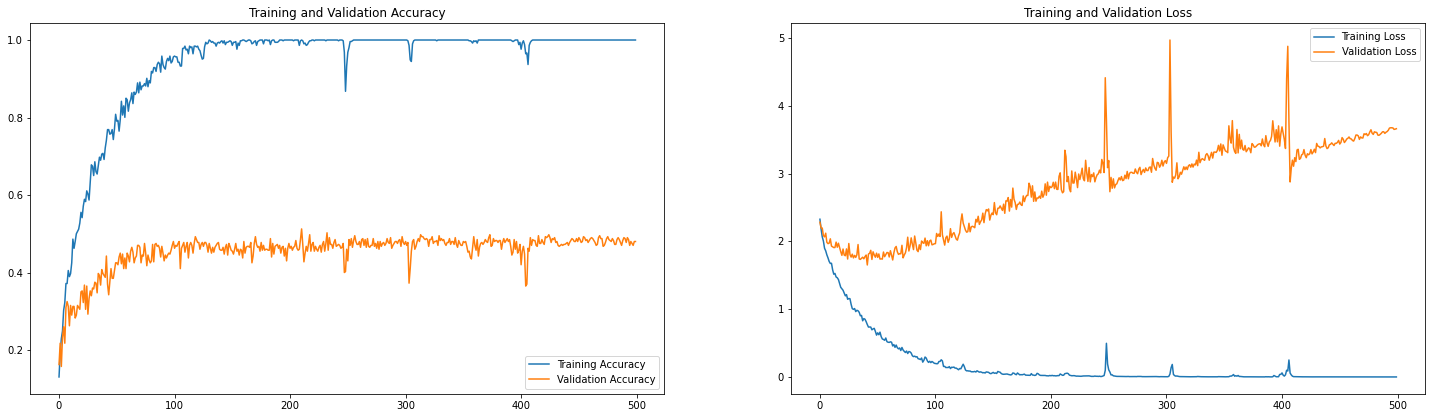

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
import pickle
history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('sim_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1080x432 with 0 Axes>

In [20]:
predictions = model.predict(x_val)
predictions = np.argmax(predictions,axis=1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.35      0.50      0.41        40
   classical       0.84      0.78      0.81        40
     country       0.41      0.42      0.42        40
       disco       0.56      0.38      0.45        40
      hiphop       0.34      0.42      0.38        40
        jazz       0.44      0.30      0.36        40
       metal       0.77      0.57      0.66        40
         pop       0.81      0.75      0.78        40
      reggae       0.32      0.42      0.37        40
        rock       0.24      0.25      0.25        40

    accuracy                           0.48       400
   macro avg       0.51      0.48      0.49       400
weighted avg       0.51      0.48      0.49       400



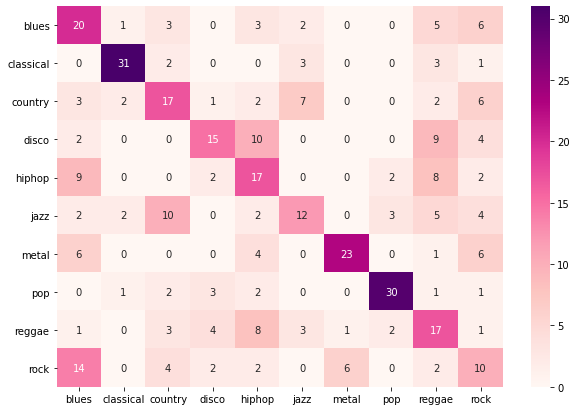

In [21]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx1.png',bbox_inches = 'tight')

In [22]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")

9420800/9406464 [==============================] - 3s 0us/step


In [25]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,tf.keras.layers.GlobalAveragePooling2D(),tf.keras.layers.Dropout(0.2),tf.keras.layers.Dense(10, activation="softmax")])

In [26]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500
16/16 [==============================] - 58s 3s/step - loss: 2.6113 - accuracy: 0.1206 - val_loss: 2.4235 - val_accuracy: 0.1275
Epoch 2/500
16/16 [==============================] - 45s 3s/step - loss: 2.4671 - accuracy: 0.1225 - val_loss: 2.3319 - val_accuracy: 0.1500
Epoch 3/500
16/16 [==============================] - 43s 3s/step - loss: 2.3571 - accuracy: 0.1423 - val_loss: 2.2763 - val_accuracy: 0.1575
Epoch 4/500
16/16 [==============================] - 45s 3s/step - loss: 2.2915 - accuracy: 0.1561 - val_loss: 2.2303 - val_accuracy: 0.1725
Epoch 5/500
16/16 [==============================] - 43s 3s/step - loss: 2.2349 - accuracy: 0.1719 - val_loss: 2.1951 - val_accuracy: 0.1825
Epoch 6/500
16/16 [==============================] - 45s 3s/step - loss: 2.1520 - accuracy: 0.2292 - val_loss: 2.1614 - val_accuracy: 0.2175
Epoch 7/500
16/16 [==============================] - 43s 3s/step - loss: 2.1538 - accuracy: 0.2075 - val_loss: 2.1314 - val_accuracy: 0.2475
Epoch 8/500
1

Epoch 59/500
16/16 [==============================] - 43s 3s/step - loss: 1.3403 - accuracy: 0.5217 - val_loss: 1.6728 - val_accuracy: 0.3450
Epoch 60/500
16/16 [==============================] - 42s 3s/step - loss: 1.3388 - accuracy: 0.5178 - val_loss: 1.6701 - val_accuracy: 0.3475
Epoch 61/500
16/16 [==============================] - 42s 3s/step - loss: 1.3511 - accuracy: 0.5198 - val_loss: 1.6672 - val_accuracy: 0.3450
Epoch 62/500
16/16 [==============================] - 42s 3s/step - loss: 1.3000 - accuracy: 0.5593 - val_loss: 1.6625 - val_accuracy: 0.3500
Epoch 63/500
16/16 [==============================] - 43s 3s/step - loss: 1.3112 - accuracy: 0.5336 - val_loss: 1.6614 - val_accuracy: 0.3500
Epoch 64/500
16/16 [==============================] - 42s 3s/step - loss: 1.2910 - accuracy: 0.5494 - val_loss: 1.6578 - val_accuracy: 0.3500
Epoch 65/500
16/16 [==============================] - 42s 3s/step - loss: 1.2937 - accuracy: 0.5494 - val_loss: 1.6550 - val_accuracy: 0.3525
Epoch 

16/16 [==============================] - 42s 3s/step - loss: 0.9142 - accuracy: 0.7174 - val_loss: 1.4696 - val_accuracy: 0.4500
Epoch 174/500
16/16 [==============================] - 43s 3s/step - loss: 0.9132 - accuracy: 0.7154 - val_loss: 1.4711 - val_accuracy: 0.4450
Epoch 175/500
16/16 [==============================] - 42s 3s/step - loss: 0.9184 - accuracy: 0.6957 - val_loss: 1.4667 - val_accuracy: 0.4575
Epoch 176/500
16/16 [==============================] - 42s 3s/step - loss: 0.9238 - accuracy: 0.7016 - val_loss: 1.4679 - val_accuracy: 0.4475
Epoch 177/500
16/16 [==============================] - 42s 3s/step - loss: 0.9015 - accuracy: 0.7174 - val_loss: 1.4709 - val_accuracy: 0.4475
Epoch 178/500
16/16 [==============================] - 43s 3s/step - loss: 0.9084 - accuracy: 0.7016 - val_loss: 1.4687 - val_accuracy: 0.4525
Epoch 179/500
16/16 [==============================] - 43s 3s/step - loss: 0.9134 - accuracy: 0.7055 - val_loss: 1.4681 - val_accuracy: 0.4425
Epoch 180/500

16/16 [==============================] - 42s 3s/step - loss: 0.7413 - accuracy: 0.7668 - val_loss: 1.3950 - val_accuracy: 0.5200
Epoch 288/500
16/16 [==============================] - 42s 3s/step - loss: 0.7316 - accuracy: 0.7806 - val_loss: 1.3975 - val_accuracy: 0.5275
Epoch 289/500
16/16 [==============================] - 43s 3s/step - loss: 0.7439 - accuracy: 0.7648 - val_loss: 1.3960 - val_accuracy: 0.5200
Epoch 290/500
16/16 [==============================] - 43s 3s/step - loss: 0.7330 - accuracy: 0.7727 - val_loss: 1.3982 - val_accuracy: 0.5175
Epoch 291/500
16/16 [==============================] - 42s 3s/step - loss: 0.7312 - accuracy: 0.7747 - val_loss: 1.4017 - val_accuracy: 0.5225
Epoch 292/500
16/16 [==============================] - 43s 3s/step - loss: 0.7248 - accuracy: 0.7866 - val_loss: 1.4003 - val_accuracy: 0.5200
Epoch 293/500
16/16 [==============================] - 42s 3s/step - loss: 0.7272 - accuracy: 0.7806 - val_loss: 1.3993 - val_accuracy: 0.5150
Epoch 294/500

16/16 [==============================] - 42s 3s/step - loss: 0.6085 - accuracy: 0.8182 - val_loss: 1.3731 - val_accuracy: 0.5300
Epoch 402/500
16/16 [==============================] - 45s 3s/step - loss: 0.6174 - accuracy: 0.8182 - val_loss: 1.3699 - val_accuracy: 0.5275
Epoch 403/500
16/16 [==============================] - 43s 3s/step - loss: 0.6280 - accuracy: 0.8004 - val_loss: 1.3658 - val_accuracy: 0.5250
Epoch 404/500
16/16 [==============================] - 42s 3s/step - loss: 0.6045 - accuracy: 0.8300 - val_loss: 1.3734 - val_accuracy: 0.5275
Epoch 405/500
16/16 [==============================] - 42s 3s/step - loss: 0.6063 - accuracy: 0.8103 - val_loss: 1.3748 - val_accuracy: 0.5275
Epoch 406/500
16/16 [==============================] - 42s 3s/step - loss: 0.6060 - accuracy: 0.8360 - val_loss: 1.3732 - val_accuracy: 0.5300
Epoch 407/500
16/16 [==============================] - 43s 3s/step - loss: 0.6164 - accuracy: 0.8261 - val_loss: 1.3736 - val_accuracy: 0.5300
Epoch 408/500

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


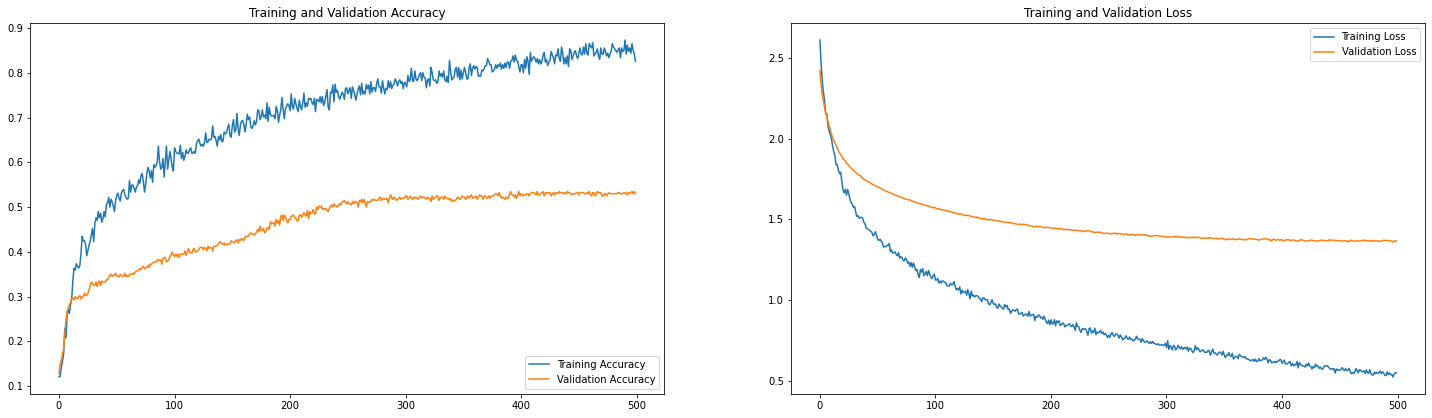

In [28]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
predictions = model.predict(x_val)
predictions = np.argmax(predictions,axis=1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.41      0.60      0.48        40
   classical       0.88      0.90      0.89        40
     country       0.41      0.30      0.35        40
       disco       0.45      0.33      0.38        40
      hiphop       0.44      0.68      0.53        40
        jazz       0.83      0.60      0.70        40
       metal       0.75      0.53      0.62        40
         pop       0.84      0.65      0.73        40
      reggae       0.40      0.45      0.42        40
        rock       0.23      0.28      0.25        40

    accuracy                           0.53       400
   macro avg       0.56      0.53      0.54       400
weighted avg       0.56      0.53      0.54       400



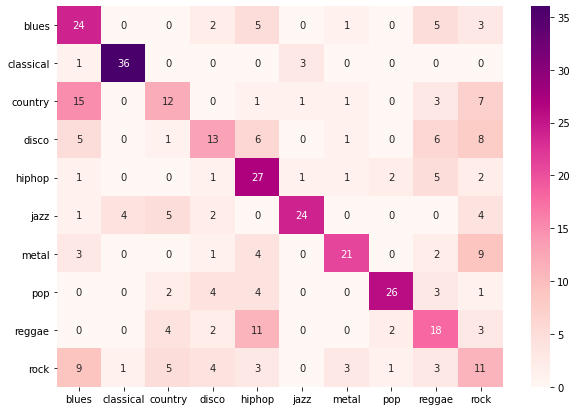

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx2.png',bbox_inches = 'tight')

In [35]:
model.save_weights('500_epoch_transfer_lr.cpkt')
pickle.dump(history1.history, open('history_500_epoch_tr.pkl','wb'))

In [41]:
sp_train = get_data('spectrogram/train')
sp_val = get_data('spectrogram/test')

wv_train = get_data('wavelets/train')
wv_val = get_data('wavelets/test')

<ipython-input-39-4b6cdbd5c0d3>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [42]:
x_sp_train = []
y_sp_train = []
x_sp_val = []
y_sp_val = []

for feature, label in sp_train:
  x_sp_train.append(feature)
  y_sp_train.append(label)

for feature, label in sp_val:
  x_sp_val.append(feature)
  y_sp_val.append(label)

# Normalize the data
x_sp_train = np.array(x_sp_train) / 255
x_sp_val = np.array(x_sp_val) / 255

x_sp_train.reshape(-1, img_size, img_size, 1)
y_sp_train = np.array(y_sp_train)

x_sp_val.reshape(-1, img_size, img_size, 1)
y_sp_val = np.array(y_sp_val)

In [43]:
x_wv_train = []
y_wv_train = []
x_wv_val = []
y_wv_val = []

for feature, label in wv_train:
  x_wv_train.append(feature)
  y_wv_train.append(label)

for feature, label in wv_val:
  x_wv_val.append(feature)
  y_wv_val.append(label)

# Normalize the data
x_wv_train = np.array(x_wv_train) / 255
x_wv_val = np.array(x_wv_val) / 255

x_wv_train.reshape(-1, img_size, img_size, 1)
y_wv_train = np.array(y_wv_train)

x_wv_val.reshape(-1, img_size, img_size, 1)
y_wv_val = np.array(y_wv_val)

In [44]:
datagen_sp = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_sp.fit(x_sp_train)

datagen_wv = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_wv.fit(x_wv_train)

In [45]:
input_sp = keras.Input(shape=(256,256,3))
input_wv = keras.Input(shape=(256,256,3))

x = Conv2D(32,3,padding="same", activation="relu")(input_sp)
x = MaxPool2D()(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(128,activation="relu")(x)
x = keras.Model(inputs=input_sp, outputs=x)

y = Conv2D(32,3,padding="same", activation="relu")(input_wv)
y = MaxPool2D()(y)
y = Conv2D(64, 3, padding="same", activation="relu")(y)
y = MaxPool2D()(y)
y = Dropout(0.4)(y)
y = Flatten()(y)
y = Dense(128,activation="relu")(y)
y = keras.Model(inputs=input_wv, outputs=y)

from tensorflow.keras.layers import concatenate
combined = concatenate([x.output, y.output])

z = Dense(32, activation="relu")(combined)
z = Dense(10, activation="softmax")(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

In [46]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 256, 256, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 256, 256, 32) 896         input_3[0][0]                    
____________________________________________________________________________________________

In [47]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

C:\Users\DELL\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [56]:
history2 = model.fit(x_sp_train,y_sp_train,epochs = 500, validation_data = (x_sp_val, y_sp_val))
import pickle
model.save_weights('500_epoch_multi_lr.cpkt')
pickle.dump(history2.history, open('history_500_epoch_multi.pkl','wb'))

Epoch 1/500


ValueError: in user code:

    C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\input_spec.py:199 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer model_2 expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 256, 256, 3) dtype=float64>]


In [52]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history2' is not defined

In [ ]:
import pickle
history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('multi_plot1.png',bbox_inches = 'tight')
plt.clf()

In [ ]:
predictions = model.predict([x_sp_val,x_wv_val])
print(classification_report(y_wv_val, np.argmax(predictions, axis=1), target_names = labels))

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
predictions = np.argmax(predictions, axis=1)
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx3.png',bbox_inches = 'tight')

In [ ]:
epochs_range = range(500)
import matplotlib.pyplot as plt
import pickle 
history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

history = pickle.load(open('history_500_epoch_tr.pkl','rb'))
acc1 = history['accuracy']
val_acc1 = history['val_accuracy']
loss1 = history['loss']
val_loss1 = history['val_loss']

history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc2 = history['accuracy']
val_acc2 = history['val_accuracy']
loss2 = history['loss']
val_loss2 = history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='CNN Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='CNN Validation Accuracy', c='red', linewidth=4)
ax1.plot(epochs_range, acc1, label='Transfer learning Training Accuracy', c = '#e72866', linewidth=4)
ax1.plot(epochs_range, val_acc1, label='Transfer learning Validation Accuracy', c='#282ec7', linewidth=4)
ax1.plot(epochs_range, acc2, label='Multi modal Training Accuracy', c = '#171c1c', linewidth=4)
ax1.plot(epochs_range, val_acc2, label='Multi modal Validation Accuracy', c='#62176e', linewidth=4)

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='CNN Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='CNN Validation Loss', c='red', linewidth=4)
ax2.plot(epochs_range, loss1, label='Transfer learning Training Loss',c = '#c72866', linewidth=4)
ax2.plot(epochs_range, val_loss1, label='Transfer learning Validation Loss', c='#282ec7', linewidth=4)
ax2.plot(epochs_range, loss2, label='Multi modal Training Loss',c = '#171c1c', linewidth=4)
ax2.plot(epochs_range, val_loss2, label='Multi modal learning Validation Loss', c='#62176e', linewidth=4)

ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('all_1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1080x432 with 0 Axes>